In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

# Data Loading

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/Top mentors data/practice/datas/RF/seattle-weather.csv')
df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

# Performing EDA

In [3]:
df.head()

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

In [4]:
df.tail()

date  precipitation  temp_max  temp_min  wind weather
1456  2015-12-27            8.6       4.4       1.7   2.9    rain
1457  2015-12-28            1.5       5.0       1.7   1.3    rain
1458  2015-12-29            0.0       7.2       0.6   2.6     fog
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1460  2015-12-31            0.0       5.6      -2.1   3.5     sun

In [5]:
df.shape

(1461, 6)

In [31]:
len(df)

1461

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
df.describe(include = 'all')

date  precipitation     temp_max     temp_min         wind  \
count         1461    1461.000000  1461.000000  1461.000000  1461.000000   
unique        1461            NaN          NaN          NaN          NaN   
top     2012-01-01            NaN          NaN          NaN          NaN   
freq             1            NaN          NaN          NaN          NaN   
mean           NaN       3.029432    16.439083     8.234771     3.241136   
std            NaN       6.680194     7.349758     5.023004     1.437825   
min            NaN       0.000000    -1.600000    -7.100000     0.400000   
25%            NaN       0.000000    10.600000     4.400000     2.200000   
50%            NaN       0.000000    15.600000     8.300000     3.000000   
75%            NaN       2.800000    22.200000    12.200000     4.000000   
max            NaN      55.900000    35.600000    18.300000     9.500000   

       weather  
count     1461  
unique       5  
top       rain  
freq       641  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [9]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [13]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [12]:
df.nunique().sum()

1778

In [16]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [21]:
df.corr()

precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000

<AxesSubplot:>

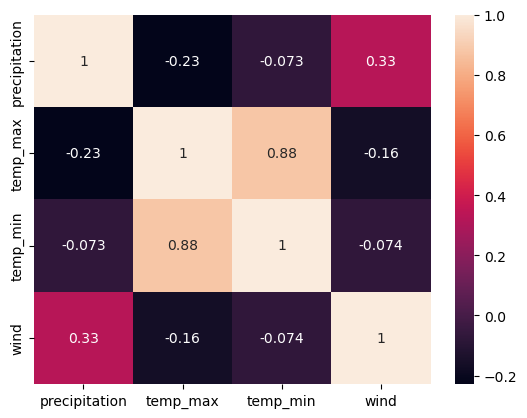

In [25]:
sns.heatmap(df.corr(), annot=True)

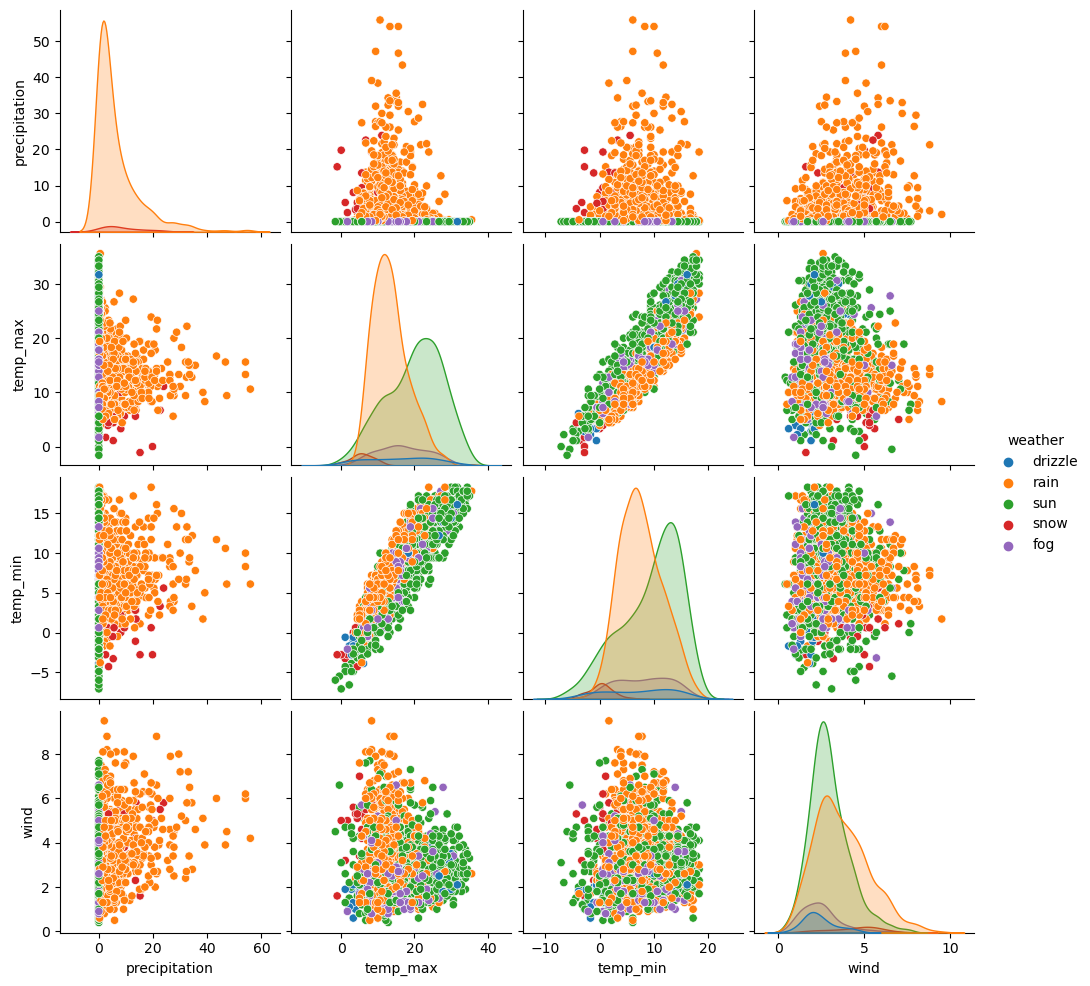

In [27]:
sns.pairplot(df, hue = 'weather')

# Dividing data into train and test data

In [34]:
x = df.drop(['date','weather'], axis=1)
x

precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
1456            8.6       4.4       1.7   2.9
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]

In [29]:
y = df['weather']
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

# Model Building

In [43]:
#model = RandomForestClassifier(bootstrap=True)
model = RandomForestClassifier(criterion = 'entropy')

In [44]:
model_train = model.fit(x,y)

# Prediction

In [45]:
pred = model_train.predict(x) 
pred

array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype=object)

# Evaluation

In [46]:
cf = confusion_matrix(y,pred) # diagnostic of classification 
cf

array([[ 50,   0,   1,   0,   2],
       [  0, 100,   0,   0,   1],
       [  0,   0, 641,   0,   0],
       [  0,   0,   0,  26,   0],
       [  0,   0,   0,   0, 640]], dtype=int64)

In [53]:
a = ConfusionMatrixDisplay(cf,display_labels=model_train.classes_)
a.plot()

In [47]:
sns.heatmap(cf, annot=True)

<AxesSubplot:>

In [48]:
accuracy_score(y,pred)

0.9972621492128679

In [49]:
# To know error
1- accuracy_score(y, pred)

0.002737850787132068